## **Objective : Training classification models to find the model which would optimally classify legitimate and malicious domains.**

Our dataset contains 10,000 total samples of legitimate and phishing domain url features.The machine learning models considered to train the dataset in this project are :
- Decision Tree
- Random Forest
- XGBoost
- Multilayer Perceptron

In [161]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory Data Analysis**

In [162]:
# loading out dataset from last notebook
df = pd.read_csv("/content/Phishing_Detection2.csv")
df.head(10)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
5,nypost.com,0,0,1,4,0,0,1,0,0,1,1,1,0,0,1,0,0
6,kienthuc.net.vn,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,0
7,thenextweb.com,0,0,1,6,0,0,0,0,0,1,0,0,0,0,1,0,0
8,tobogo.net,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
9,akhbarelyom.com,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0


In [163]:
df.tail(10)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
9990,currentlyattreply.weebly.com,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
9991,weddenoptennis.be,0,0,0,3,0,0,0,0,0,1,1,1,0,0,1,0,1
9992,old.vps.exoret.com,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1
9993,sparkpassedecom.com,0,0,0,2,0,0,0,0,0,1,1,1,0,0,1,0,1
9994,info.lionnets.com,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
9996,adplife.com,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,0,1,1,1,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
9999,sieck-kuehlsysteme.de,0,1,1,4,0,0,1,1,0,1,1,1,0,0,1,0,1


In [164]:
df.shape

(10000, 18)

In [165]:
df.info()  #prints info about features(dtype,non-null values,memory usage etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

In [166]:
df.describe()  #describe statistics of features (mean,median,mode,count etc)

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [167]:
df.corr()     #computes pairwise pearson's correlation among features

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
Have_IP,1.000000,-0.011308,-0.076021,-0.030466,-0.008700,-0.001052,-0.023430,-0.023841,-0.011425,0.024279,0.047349,0.018799,-0.004701,0.007251,0.001968,-0.003487,0.074367
Have_At,-0.011308,1.000000,0.067844,0.029944,-0.000297,-0.002151,0.067122,0.018369,0.025073,-0.017002,-0.017072,0.001651,-0.008294,-0.021728,0.004025,-0.030246,0.118419
URL_Length,-0.076021,0.067844,1.000000,0.439378,0.038482,0.007656,-0.005318,-0.146102,-0.019508,0.063717,0.071029,0.028755,-0.039903,-0.068104,0.030833,-0.023651,-0.541287
URL_Depth,-0.030466,0.029944,0.439378,1.000000,-0.040189,-0.000478,0.010980,-0.114919,-0.086073,0.075315,-0.070101,-0.061798,-0.039297,-0.105889,-0.002657,-0.051248,-0.119707
Redirection,-0.008700,-0.000297,0.038482,-0.040189,1.000000,-0.001655,0.026634,-0.025581,-0.027654,0.018784,0.012581,0.025758,-0.012876,-0.017346,0.003096,-0.023193,0.002600
https_Domain,-0.001052,-0.002151,0.007656,-0.000478,-0.001655,1.000000,-0.004456,-0.004534,0.042243,-0.033112,0.016837,0.006852,-0.004472,-0.003778,0.000374,-0.004852,0.014144
TinyURL,-0.023430,0.067122,-0.005318,0.010980,0.026634,-0.004456,1.000000,0.087421,0.059078,0.040888,0.095944,0.006812,-0.062000,-0.054771,0.008339,-0.003508,0.072921
Prefix/Suffix,-0.023841,0.018369,-0.146102,-0.114919,-0.025581,-0.004534,0.087421,1.000000,-0.006793,-0.046843,-0.019954,0.031711,0.050594,0.070263,-0.017527,0.030102,0.302705
DNS_Record,-0.011425,0.025073,-0.019508,-0.086073,-0.027654,0.042243,0.059078,-0.006793,1.000000,0.065776,0.398583,0.162210,0.103266,0.094410,0.008861,0.042050,0.015943
Web_Traffic,0.024279,-0.017002,0.063717,0.075315,0.018784,-0.033112,0.040888,-0.046843,0.065776,1.000000,0.013681,0.015998,0.006990,0.057473,0.051495,0.073485,-0.108793


In [168]:
# number of legit(0) and phishing(1) url samples
df["Label"].value_counts()

1    5000
0    5000
Name: Label, dtype: int64

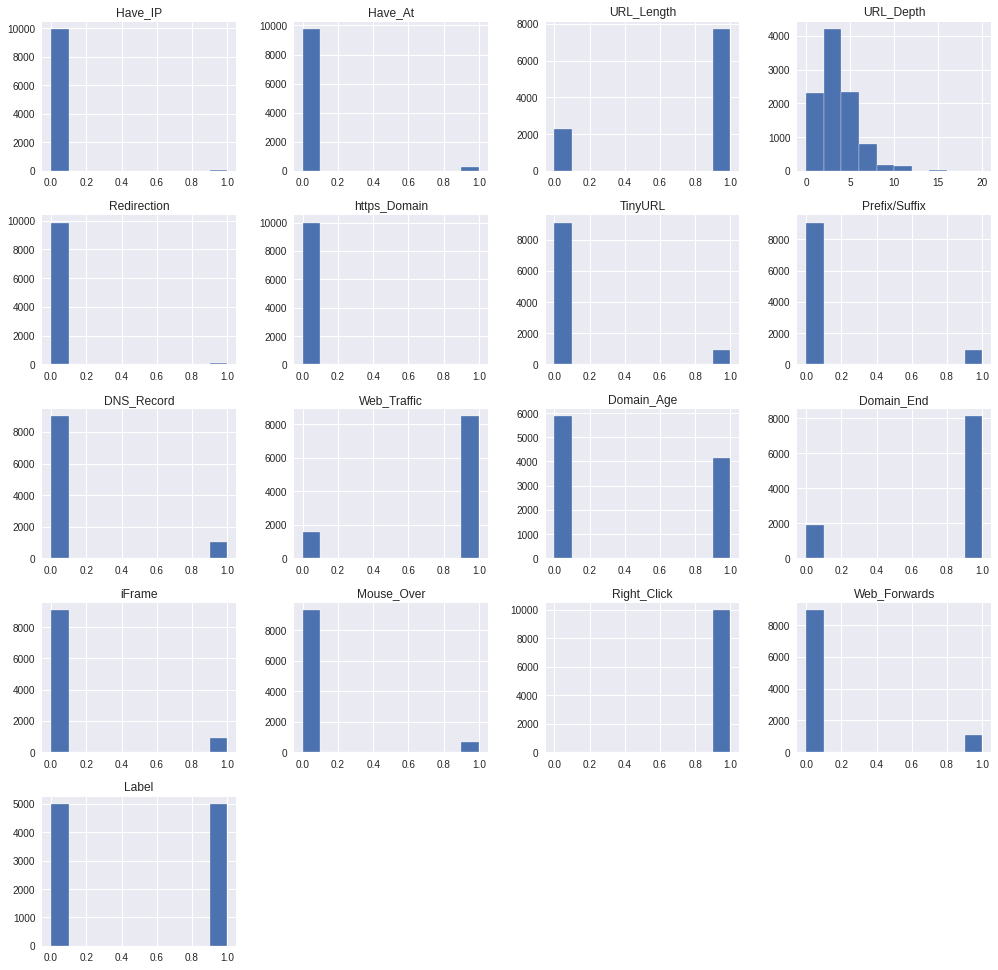

In [169]:
# creating histograms of all features
df.hist(figsize=(17,17))
plt.xlabel("value")
plt.ylabel("count")
plt.show()

In [170]:
!pip install autoviz

Shape of your Data Set loaded: (10000, 18)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    17 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables

################ Binary_Classification VISUALIZATION Started #####################


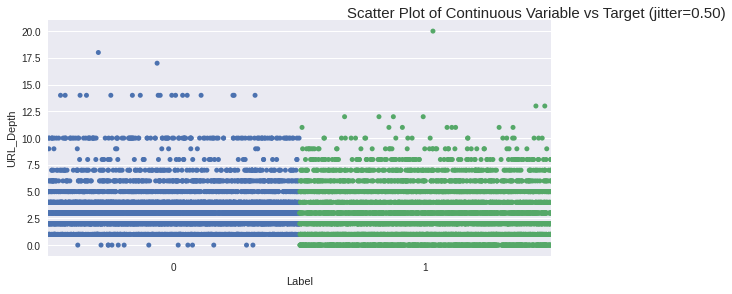

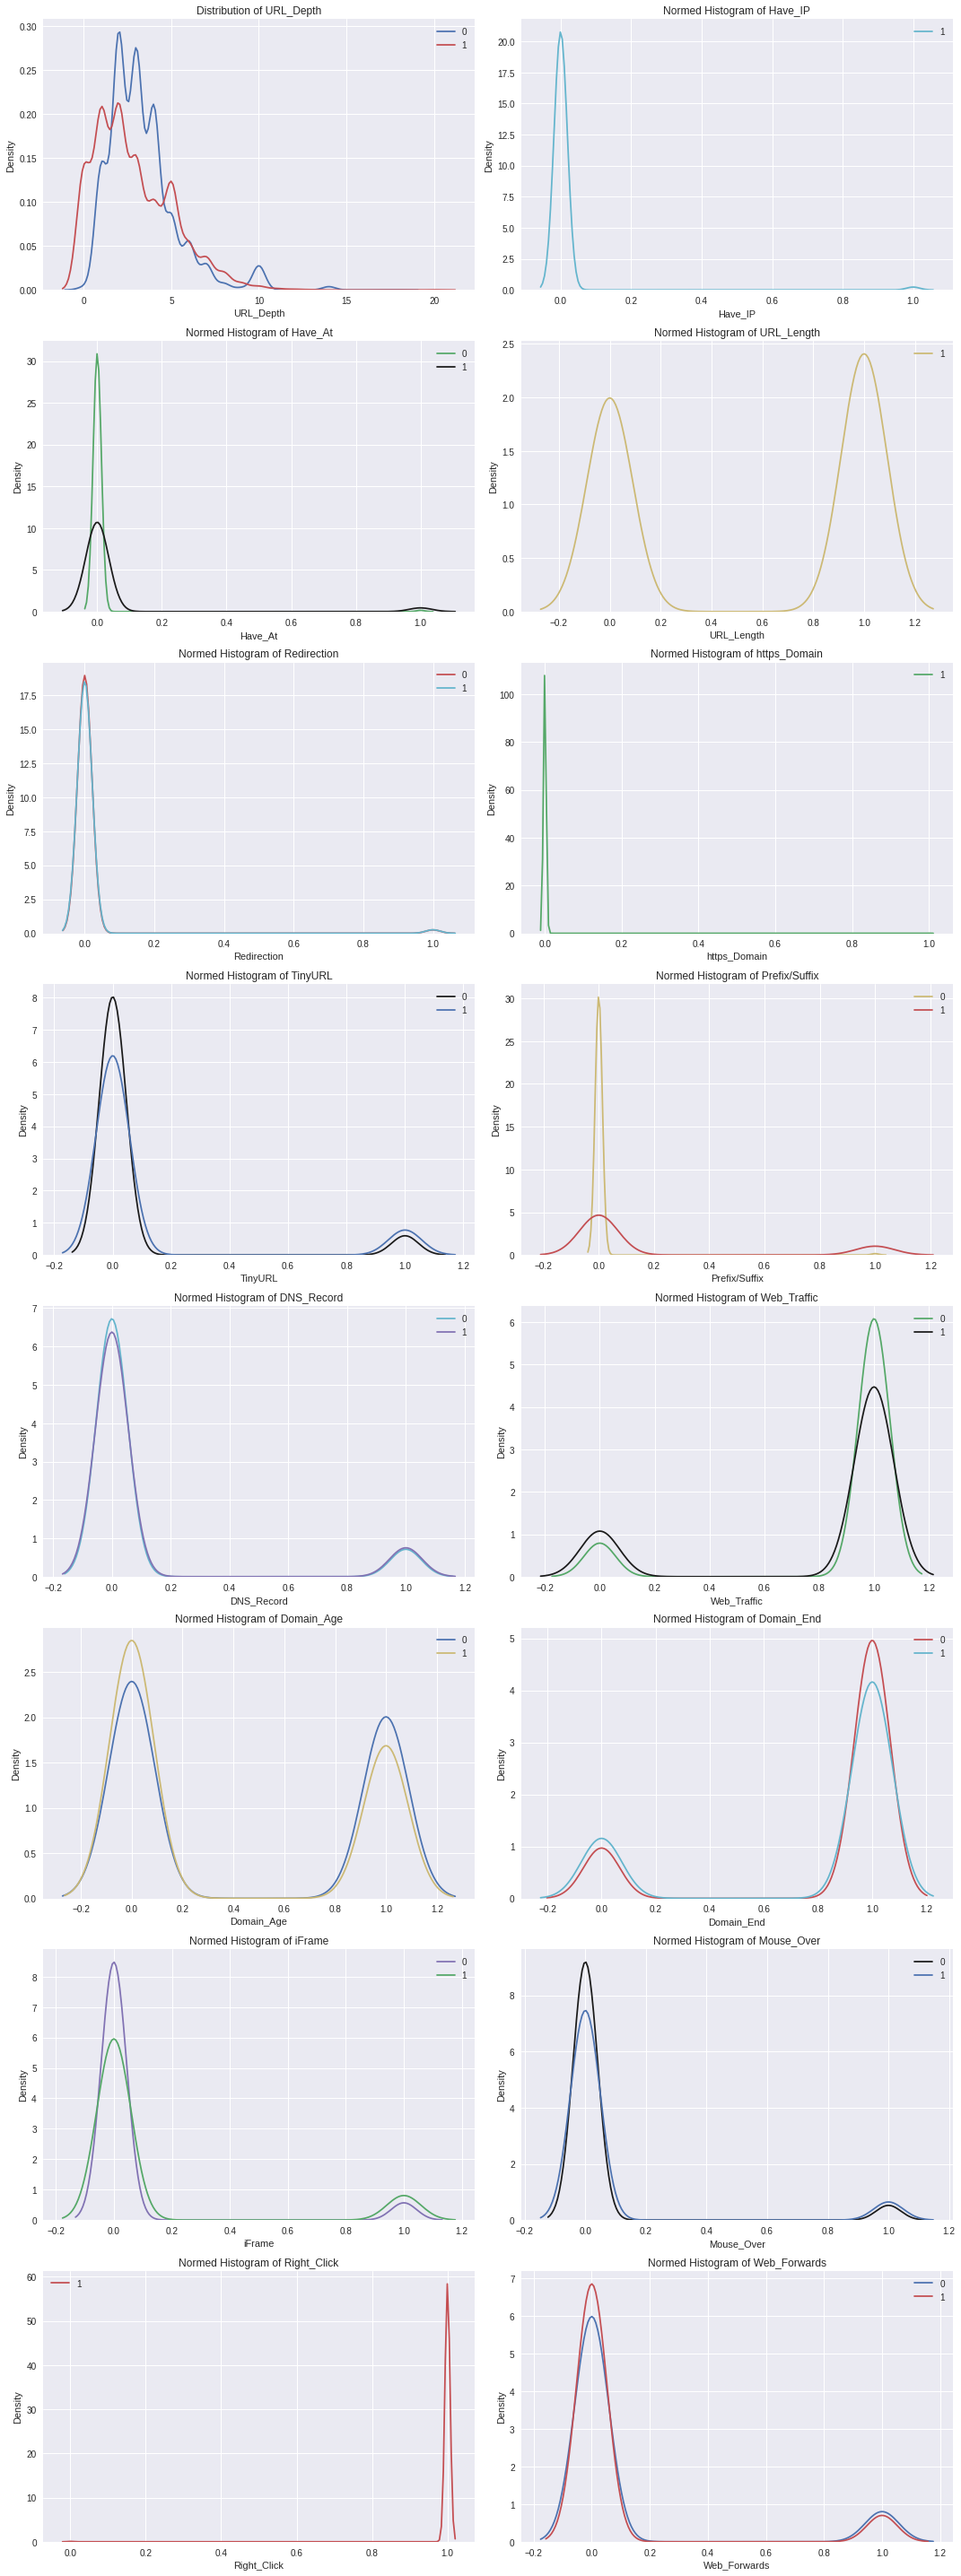

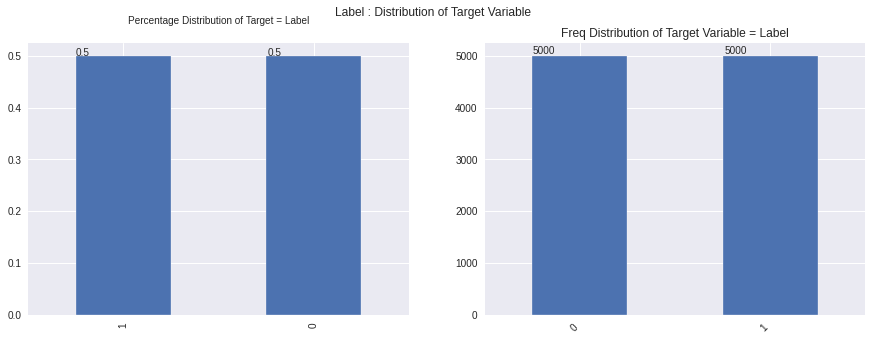

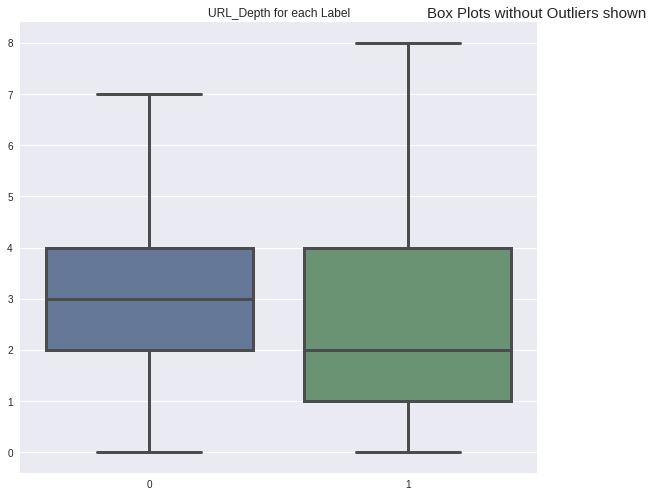

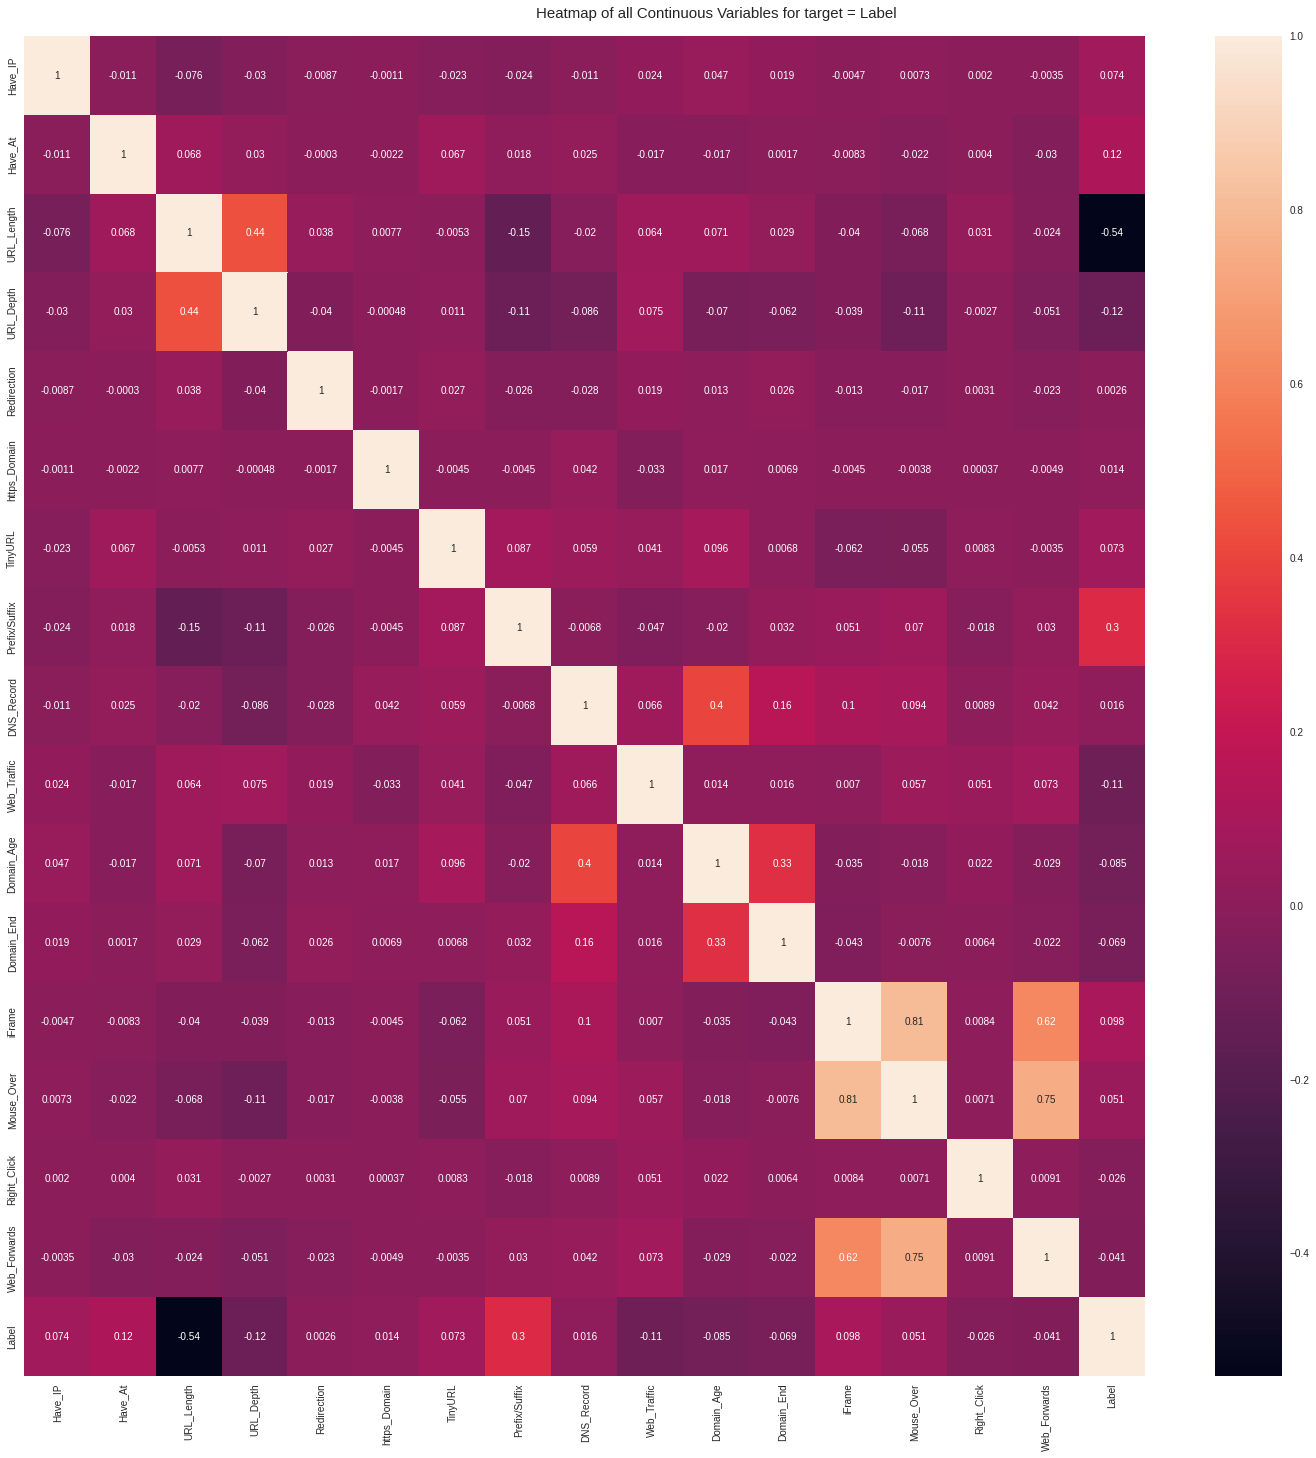

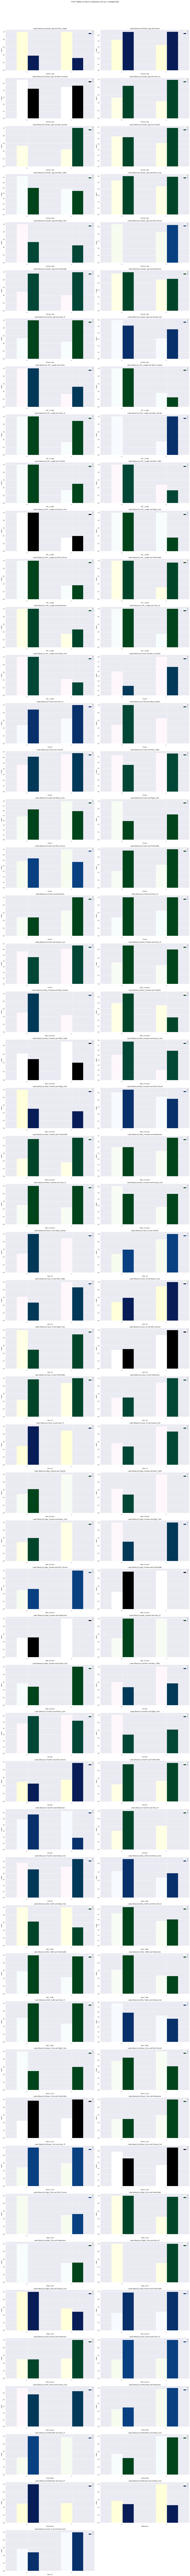

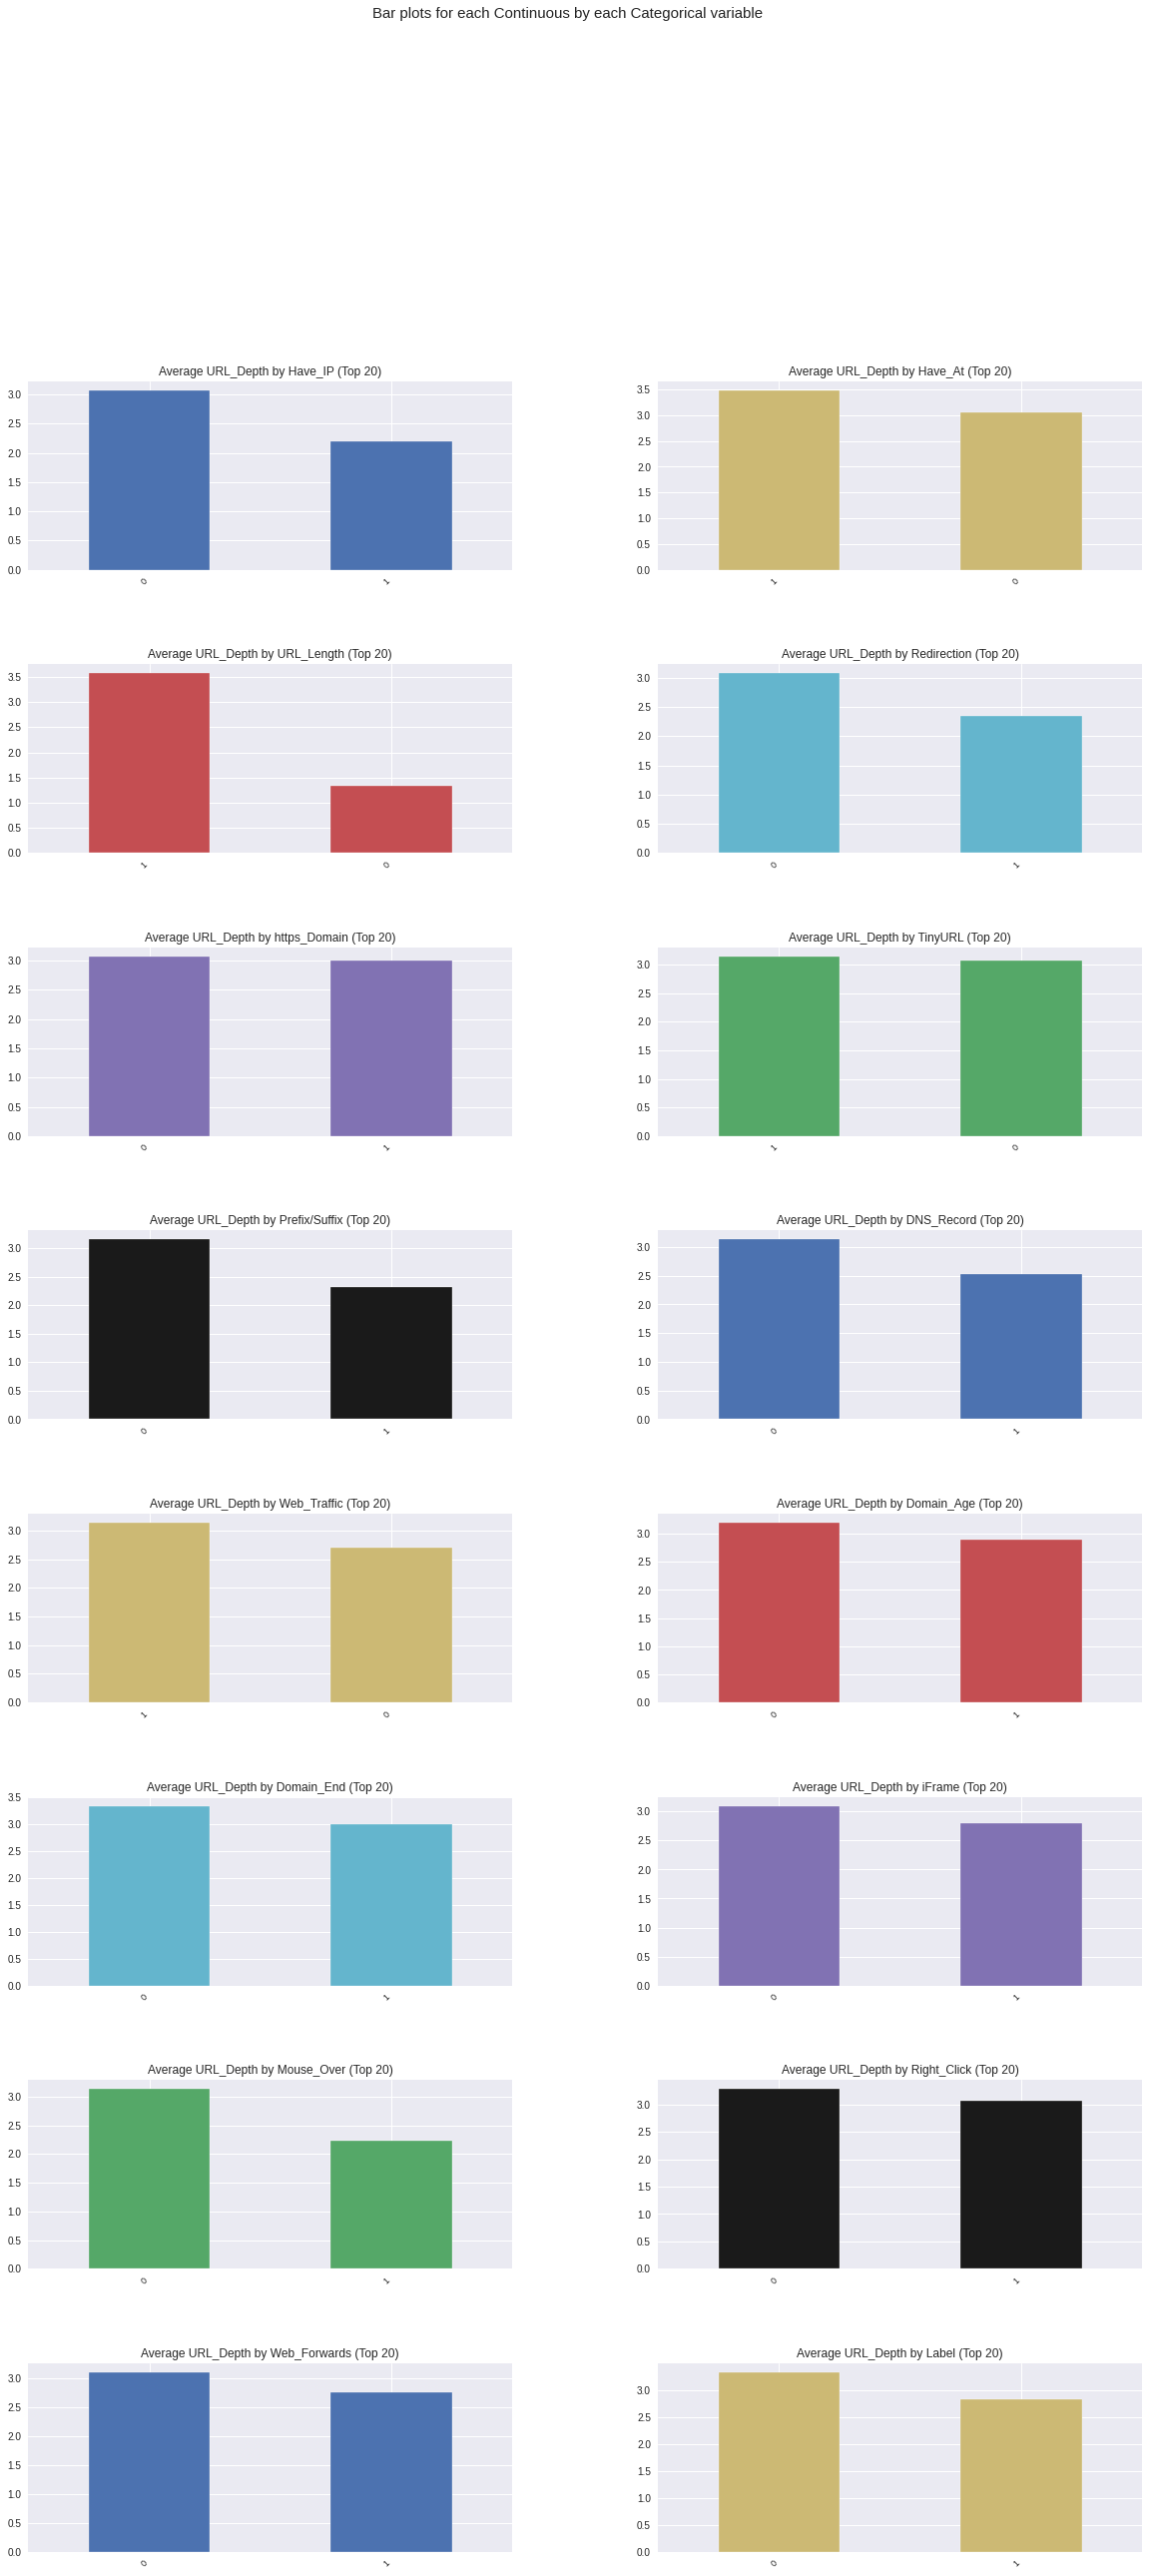

Time to run AutoViz (in seconds) = 45

 ###################### VISUALIZATION Completed ########################


In [171]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
df = AV.AutoViz(
    filename="/content/Phishing_Detection2.csv",
    depVar="Label") #target feature

# **Data Splitting**

We'll follow 70:30 ratio where we'll use 70% of data for training and 30% of data for testing

In [172]:
# Seperate x and y
df.head(10)

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
5,0,0,1,4,0,0,1,0,0,1,1,1,0,0,1,0,0
6,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,0
7,0,0,1,6,0,0,0,0,0,1,0,0,0,0,1,0,0
8,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
9,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0


In [173]:
x = df.drop("Label",axis=1)
y = df["Label"]

print(x.shape)
print(y.shape)

(10000, 16)
(10000,)


In [174]:
x.head(10)

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0
5,0,0,1,4,0,0,1,0,0,1,1,1,0,0,1,0
6,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0
7,0,0,1,6,0,0,0,0,0,1,0,0,0,0,1,0
8,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0
9,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0


In [175]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Label, dtype: int64

In [176]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=42)

In [177]:
x_train.head(20)

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
9069,0,0,1,5,0,0,0,0,0,1,1,1,0,0,1,0
2603,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0
7738,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1
1579,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0
5058,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5753,0,0,1,5,0,0,0,0,0,1,0,0,0,0,1,0
3548,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0
409,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,1
4097,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0
6461,0,1,1,2,0,0,1,0,0,1,1,1,0,0,1,0


In [178]:
# check the proportion of true & false samples in train set
y_train.value_counts()

1    3537
0    3463
Name: Label, dtype: int64

In [179]:
# check the proportion of true & false samples in test set
y_test.value_counts()

0    1537
1    1463
Name: Label, dtype: int64

# **Model Training**

**NOTE : Run this code on GPU**

In [180]:
from sklearn.metrics import accuracy_score,classification_report

# These will store accuracies of models
model_names = []
trainset_acc = []
testset_acc = []

def storeAccuracies(model_name,train_acc,test_acc):
  model_names.append(model_name)
  trainset_acc.append(round(train_acc,3))
  testset_acc.append(round(test_acc,3))

# prints all stored accuracies
def printAccuracies():
  acc = pd.DataFrame({ 'ML Model': model_names,    
    'Train Accuracy': trainset_acc,
    'Test Accuracy': testset_acc})
  
  acc.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

  print(acc)


###  **1.1] Decision Tree**

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [181]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=7)
# start training the model
model.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### **Model performance evaluation**

In [182]:
# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

# storing accuracies
storeAccuracies("Decision Tree",train_acc,test_acc)

Accuracy on Training dataset :  0.821
Accuracy on Testing dataset :  0.822


In [183]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       0.99      0.75      0.85      2037
   malicious       0.65      0.98      0.78       963

    accuracy                           0.82      3000
   macro avg       0.82      0.86      0.82      3000
weighted avg       0.88      0.82      0.83      3000



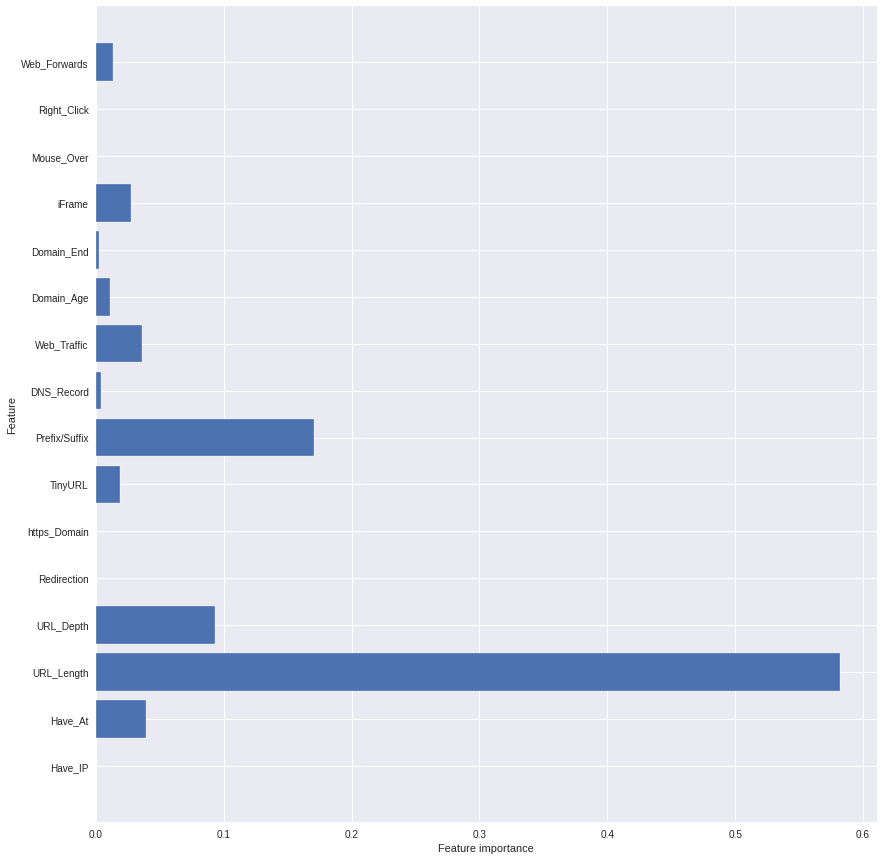

In [184]:
#checking the feature improtance in the model
plt.figure(figsize=(14,15))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### **1.2] Random Forest**

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [185]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=7)
# start training the model
model.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### **Model performance evaluation**

In [186]:
# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

# storing accuracies
storeAccuracies("Random Forest",train_acc,test_acc)

Accuracy on Training dataset :  0.83
Accuracy on Testing dataset :  0.83


In [187]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       0.99      0.75      0.86      2017
   malicious       0.66      0.98      0.79       983

    accuracy                           0.83      3000
   macro avg       0.83      0.87      0.82      3000
weighted avg       0.88      0.83      0.84      3000



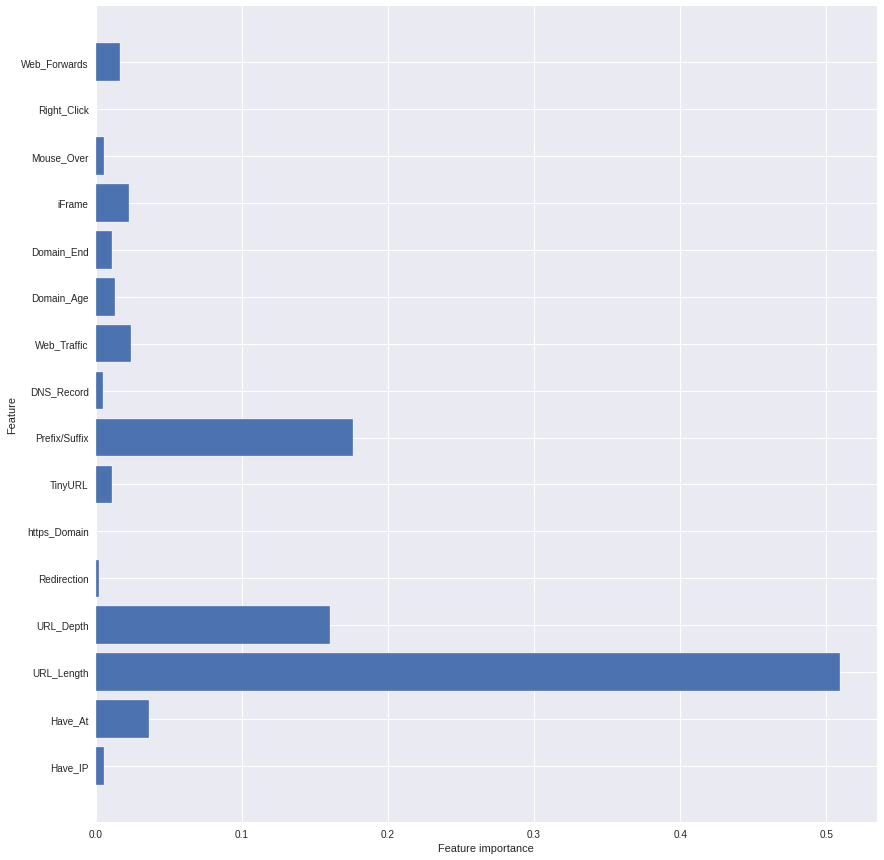

In [188]:
#checking the feature improtance in the model
plt.figure(figsize=(14,15))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### **1.3] XGBoost**

XGBoost stands for Extreme Gradient Boosting; it is a specific implementation of the Gradient Boosting method which uses more accurate approximations to find the best tree model. It employs a number of nifty tricks that make it exceptionally successful, particularly with structured data.

In [189]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

#fit the model
xgb.fit(x_train.values, y_train.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### **Model performance evaluation**

In [190]:
# finding y_pred for train and test dataset
y_pred_train = xgb.predict(x_train.values)
y_pred_test = xgb.predict(x_test.values)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

# storing accuracies
storeAccuracies("XGB",train_acc,test_acc)

Accuracy on Training dataset :  0.866
Accuracy on Testing dataset :  0.861


In [191]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       0.96      0.81      0.88      1822
   malicious       0.76      0.94      0.84      1178

    accuracy                           0.86      3000
   macro avg       0.86      0.88      0.86      3000
weighted avg       0.88      0.86      0.86      3000



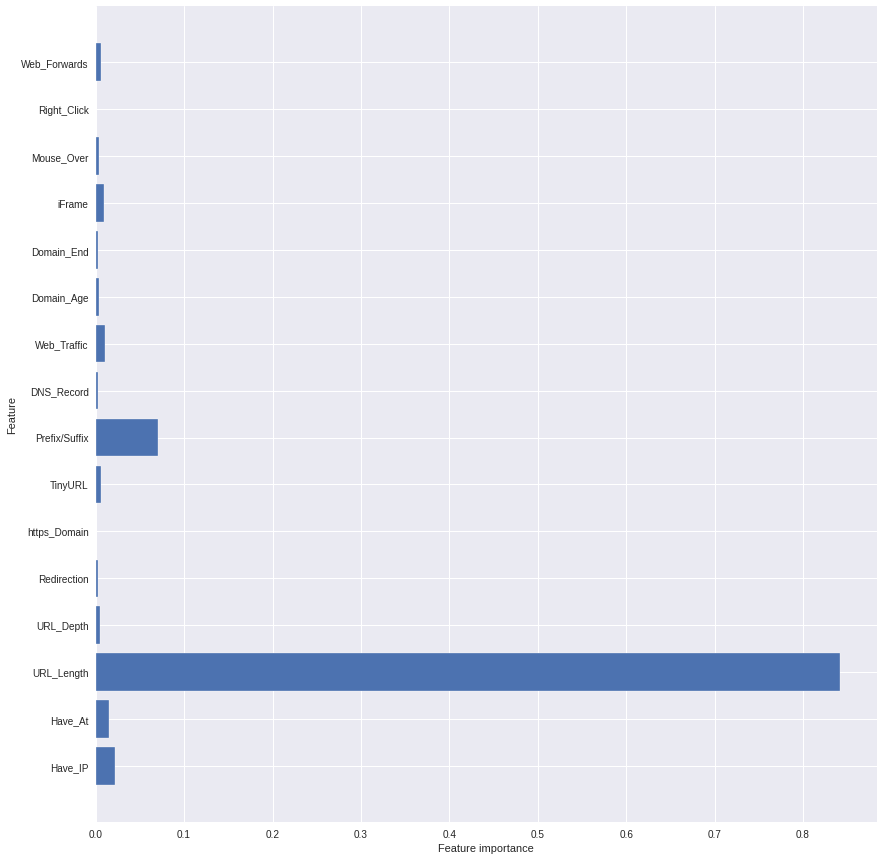

In [192]:
#checking the feature improtance in the model
plt.figure(figsize=(14,15))
n_features = x_train.shape[1]
plt.barh(range(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### **1.4] Multilayer Perceptron (Deep Learning)**

A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.

In [193]:

from sklearn.neural_network import MLPClassifier

# instantiate the model
model = MLPClassifier(solver="adam",alpha=0.001, hidden_layer_sizes=([100,100,100]),random_state=42)

# fit the model 
model.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### **Model performance evaluation**

In [194]:
# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

# storing accuracies
storeAccuracies("MLP",train_acc,test_acc)

Accuracy on Training dataset :  0.864
Accuracy on Testing dataset :  0.857


In [195]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       0.93      0.82      0.87      1753
   malicious       0.78      0.91      0.84      1247

    accuracy                           0.86      3000
   macro avg       0.85      0.86      0.86      3000
weighted avg       0.87      0.86      0.86      3000



# **Comparing models on accuracy**

In [196]:
# Lets print the stored accuracies of each trained model
printAccuracies()

        ML Model  Train Accuracy  Test Accuracy
0  Decision Tree           0.821          0.822
1  Random Forest           0.830          0.830
2            XGB           0.866          0.861
3            MLP           0.864          0.857


**From the above comparision, it is clear that the XGBoost Classifier works well with this dataset.We'll save this model for using it in production**

In [197]:

# save XGBoost model to file
import pickle

pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))


In [198]:
# Print pip ist

!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
autoviz                       0.1.21
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4        

## **Testing the saved model**

In [199]:
""" NOTE : if you're using XGBoost 1.0 or above , you can't load a pickled model.
Currently I am using xgboost 0.90 """

# Load the saved model file
model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [200]:
!pip install whois

In [201]:
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime
from urllib.parse import urlparse
import ipaddress
import re
import requests


# ----------------------------------------------------------------------------------------------

# Feature Extraction methods which will be used to extract each feature.

# Checks for IP address in URL (Have_IP)
def havingIP(url):
    print("havingIP() --> called")
    try:
        ipaddress.ip_address(url)
        ip = 1
    except:
        ip = 0
    return ip


# Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
    print("haveAtSign() --> called")
    if "@" in url:
        at = 1
    else:
        at = 0
    return at


# Finding the length of URL and categorizing (URL_Length)
def getLength(url):
    print("getLength() --> called")
    if len(url) < 54:
        length = 0
    else:
        length = 1
    return length


# Gives number of '/' in URL (URL_Depth)
def getDepth(url):
    print("getDepth() --> called")
    s = urlparse(url).path.split('/')
    depth = 0
    for j in range(len(s)):
        if len(s[j]) != 0:
            depth = depth + 1
    return depth


# Checking for redirection '//' in the url (Redirection)
def redirection(url):
    print("redirection() --> called")
    pos = url.rfind('//')
    if pos > 6:
        if pos > 7:
            return 1
        else:
            return 0
    else:
        return 0


# Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
    print("httpDomain() --> called")
    domain = urlparse(url).netloc
    if 'https' in domain:
        return 1
    else:
        return 0


# listing url shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"


# Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    print("tinyURL() --> called")
    match = re.search(shortening_services, url)
    if match:
        return 1
    else:
        return 0


# Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    print("prefixSuffix() --> called")
    if '-' in urlparse(url).netloc:
        return 1  # phishing
    else:
        return 0  # legitimate


# Web traffic (Web_Traffic)
def web_traffic(url):
    print("web_traffic() --> called")
    try:
        # Filling the whitespaces in the URL if any
        url = urllib.parse.quote(url)
        rank = \
            BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(),
                          "xml").find(
                "REACH")['RANK']
        rank = int(rank)
    except TypeError:
        return 1
    if rank < 100000:
        return 1
    else:
        return 0


# Survival time of domain: The difference between termination time and creation time (Domain_Age)
def domainAge(domain_name):
    print("domainAge() --> called")
    creation_date = domain_name.creation_date
    expiration_date = domain_name.expiration_date
    if (isinstance(creation_date, str) or isinstance(expiration_date, str)):
        try:
            creation_date = datetime.strptime(creation_date, '%Y-%m-%d')
            expiration_date = datetime.strptime(expiration_date, "%Y-%m-%d")
        except:
            return 1
    if ((expiration_date is None) or (creation_date is None)):
        return 1
    elif ((type(expiration_date) is list) or (type(creation_date) is list)):
        return 1
    else:
        ageofdomain = abs((expiration_date - creation_date).days)
        if ((ageofdomain / 30) < 6):
            age = 1
        else:
            age = 0
    return age


# End time of domain: The difference between termination time and current time (Domain_End)
def domainEnd(domain_name):
    print("domainEnd() --> called")
    expiration_date = domain_name.expiration_date
    if isinstance(expiration_date, str):
        try:
            expiration_date = datetime.strptime(expiration_date, "%Y-%m-%d")
        except:
            return 1
    if (expiration_date is None):
        return 1
    elif (type(expiration_date) is list):
        return 1
    else:
        today = datetime.now()
        end = abs((expiration_date - today).days)
        if ((end / 30) < 6):
            end = 0
        else:
            end = 1
    return end


# IFrame Redirection (iFrame)
def iframe(response):
    print("iframe() --> called")
    if response == "":
        return 1
    else:
        if re.findall(r"[<iframe>|<frameBorder>]", response.text):
            return 0
        else:
            return 1


# Checks the effect of mouse over on status bar (Mouse_Over)
def mouseOver(response):
    print("mouseOver() --> called")
    if response == "":
        return 1
    else:
        if re.findall("<script>.+onmouseover.+</script>", response.text):
            return 1
        else:
            return 0


# Checks the status of the right click attribute (Right_Click)
def rightClick(response):
    print("rightClick() --> called")
    if response == "":
        return 1
    else:
        if re.findall(r"event.button ?== ?2", response.text):
            return 0
        else:
            return 1


# Checks the number of forwardings (Web_Forwards)
def forwarding(response):
    print("forwarding() --> called")
    if response == "":
        return 1
    else:
        if len(response.history) <= 2:
            return 0
        else:
            return 1


# ----------------------------------------------------------------------------------------------

# This is the main Function to extract 16 features.
# It returns a list of feature values given url.

def get_features(url):
    features = []
    # Address bar based features
    features.append(havingIP(url))
    features.append(haveAtSign(url))
    features.append(getLength(url))
    features.append(getDepth(url))
    features.append(redirection(url))
    features.append(httpDomain(url))
    features.append(tinyURL(url))
    features.append(prefixSuffix(url))

    # Domain based features
    dns = 0
    try:
        print("DNS() --> called")
        domain_name = whois.whois(urlparse(url).netloc)
    except:
        dns = 1

    features.append(dns)
    features.append(web_traffic(url))
    features.append(1 if dns == 1 else domainAge(domain_name))
    features.append(1 if dns == 1 else domainEnd(domain_name))

    # HTML & Javascript based features
    try:
        response = requests.get(url)
    except:
        response = ""
    features.append(iframe(response))
    features.append(mouseOver(response))
    features.append(rightClick(response))
    features.append(forwarding(response))

    return features


get_features("www.spacex.com")

havingIP() --> called
haveAtSign() --> called
getLength() --> called
getDepth() --> called
redirection() --> called
httpDomain() --> called
tinyURL() --> called
prefixSuffix() --> called
DNS() --> called
web_traffic() --> called
iframe() --> called
mouseOver() --> called
rightClick() --> called
forwarding() --> called


[0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [204]:
# lets predict if given url is malicious or not

url = "https://www.myliffff345533222983hjwowokme.com/djpre59"
url_features = get_features(url)
print(url_features)

prediction = model.predict(url_features)
print("Model Prediction : ",prediction)


havingIP() --> called
haveAtSign() --> called
getLength() --> called
getDepth() --> called
redirection() --> called
httpDomain() --> called
tinyURL() --> called
prefixSuffix() --> called
DNS() --> called
web_traffic() --> called
iframe() --> called
mouseOver() --> called
rightClick() --> called
forwarding() --> called
[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
Model Prediction :  [1]


## **Conclusion : We have achieved our objective for this notebook,we trained multiple ML models and saved the best model for production use case.**

## **References -**
- https://mljar.com/blog/xgboost-save-load-python/